# Importing Libraries

In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
import os
%matplotlib inline

# Testing for one image

### <span style="color: pink;">Question - What is cv2?</span>

The cv2 library in Python refers to OpenCV, which stands for Open Source Computer Vision Library. It's a powerful library used for various computer vision tasks such as image and video processing, object detection, face recognition, and more.

### <span style="color: yellow;">Loading the test image</span>

(534, 800, 3)


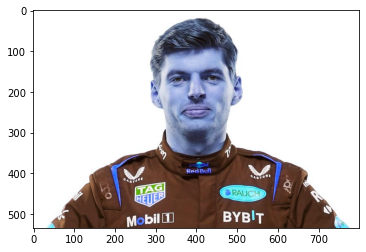

In [2]:
img = cv2.imread('raw_images/max_verstappen/max_verstappen_2.jpg')
print(img.shape)
plt.imshow(img)

In [3]:
# converting the picture to be gray

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(534, 800)

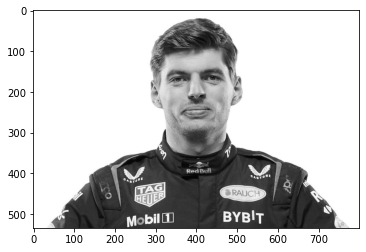

In [4]:
plt.imshow(gray, cmap='gray')

### <span style="color: pink;">Question - Why did we convert the image to gray?</span>

- **Dimension Reduction**: Grayscale images have only one channel (intensity) compared to three channels (red, green, blue) in color images. This reduces the computational complexity of subsequent operations, making them faster and more memory-efficient.

- **Simplicity**: Many computer vision algorithms, such as edge detection, feature extraction, and template matching, can be simpler to implement and more effective when applied to grayscale images.

- **Noise Reduction**: Color information can sometimes introduce unnecessary complexity and noise into the image. Converting to grayscale removes this color noise, allowing algorithms to focus on the structural aspects of the image.

- **Uniformity**: Grayscale images provide uniformity in terms of brightness and contrast, making it easier to compare and analyze different parts of the image.

- **Memory Efficiency**: Grayscale images consume less memory compared to their color counterparts, which can be advantageous when dealing with large datasets or limited computational resources.

### <span style="color: yellow;">Importing Cascade Classifiers</span>

### <span style="color: pink;">Question - What are haarcascades files?</span> 

Cascade classifiers in OpenCV (cv2) are a type of machine learning algorithm used primarily for object detection in images or videos. They are particularly well-known for their application in detecting faces, although they can be trained to detect other objects as well.

The term "cascade" refers to the sequential application of multiple classifiers arranged in a cascade structure. Each classifier in the cascade is responsible for a specific task, typically detecting a particular feature of the object being sought. The cascade structure allows for efficient and fast detection by quickly rejecting regions of the image that are unlikely to contain the object.
 
You can download Haarcascades xml files form here --> https://github.com/opencv/opencv/tree/master/data/haarcascades

In [5]:
# importing haarcascade files

face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_eye.xml')


293 82 211 211


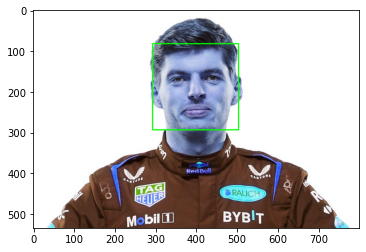

In [6]:
# Detect faces in the image

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)


#drawing a rectangle around the face

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    print(x,y,w,h)
    plt.imshow(face_img)

cv2.destroyAllWindows()

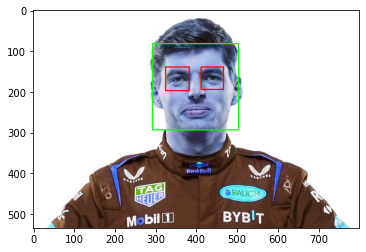

In [7]:
# similarly detecting eyes in the image

for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
    plt.imshow(face_img, cmap='gray')
        

### <span style="color: pink;">Question - What do ROI-Gray and ROI-Color mean?</span> 

- This line extracts the region of interest (ROI) from the grayscale image gray, corresponding to the detected face. It uses array slicing to extract the region defined by the bounding box coordinates (x, y) and (x+w, y+h).

- This line extracts the region of interest (ROI) from the color image face_img, corresponding to the detected face. Similar to the grayscale ROI extraction, it uses array slicing.



### <span style="color: yellow;">Creating a cropped image of the ROI to be used in model building</span>

In [8]:
# creating a function that summarizes the work we did above (without rectangles)
# we also avoid any images that has less than two eys (side pictures) in our process to make sure we create good input for our model

def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        # if there is two or more eyes (to avoid capturing side images that we don't want to use in the model)
        if len(eyes) >= 2:
            return roi_color

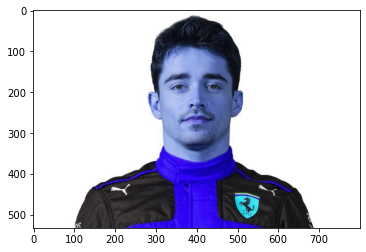

In [9]:
# test run of the function

original_image = cv2.imread('raw_images/charles_leclerc/charles_leclerc_1.jpg')
plt.imshow(original_image)

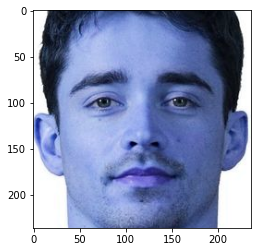

In [10]:
cropped_image = get_cropped_image_if_2_eyes('raw_images/charles_leclerc/charles_leclerc_1.jpg')
plt.imshow(cropped_image)

# Converting saved images to cropped images in bulk

### <span style="color: yellow;">Creating folders to save the cropped images</span>

In [11]:
import os


keywords = ["Pierre Gasly","Esteban Ocon","Fernando Alonso","Lance Stroll","Charles Leclerc","Carlos Sainz","Nico Hulkenberg","Kevin Magnussen",
            "Lando Norris","Oscar Piastri","George Russell","Lewis Hamilton","Sergio Perez","Max Verstappen","Valtteri Bottas","Zhou Guanyu", "Daniel Ricciardo","Yuki Tsunoda","Alex Albon","Logan Sargeant"]


# Specify the path where you want to create the folders
path = "cropped_images/"

# List of folder names you want to create
folders = [name.lower().replace(" ", "_") for name in keywords]

# Iterate over the list of folder names and create them
for folder in folders:
    folder_path = os.path.join(path, folder)
    os.makedirs(folder_path, exist_ok=True)  # exist_ok=True prevents an error if the folder already exists
    print(f"Folder '{folder}' created at {folder_path}")

In [12]:
# keywords = ["Pierre Gasly","Esteban Ocon","Fernando Alonso","Lance Stroll","Charles Leclerc","Carlos Sainz","Nico Hulkenberg","Kevin Magnussen",
#             "Lando Norris","Oscar Piastri","George Russell","Lewis Hamilton","Sergio Perez","Max Verstappen","Valtteri Bottas","Zhou Guanyu", "Daniel Ricciardo","Yuki Tsunoda","Alex Albon","Logan Sargeant"]


# keywords = ["Lewis Hamilton","Max Verstappen"]

# keywords_1 = [name.lower().replace(" ", "_") for name in keywords]

# for keyword in keywords_1:
    
#     print(f"Cropping images of {keyword}")

#     directory = os.fsencode(f'raw_images/{keyword}')

#     for file in os.listdir(directory):
#         filename = os.fsdecode(file)
#         if filename.endswith(".jpg"):
#             input_path = f"raw_images/{keyword}" + '/' + filename
            
#             try:
#                 output_path = f"cropped_images/{keyword}" + '/' + filename 
#                 cv2.imwrite(output_path, get_cropped_image_if_2_eyes(input_path))
#             except:
#                 pass
#         else:
#             continue

### <span style="color: red;"> **Note:**</span> <span style="color: yellow;"> Make sure to manually check the cropped image to make sure that you're only capturing the person you want as input for your model (Google images can contain images of the target with other people. Therefore, this cleaning needs to be done manually.


For example:</span>



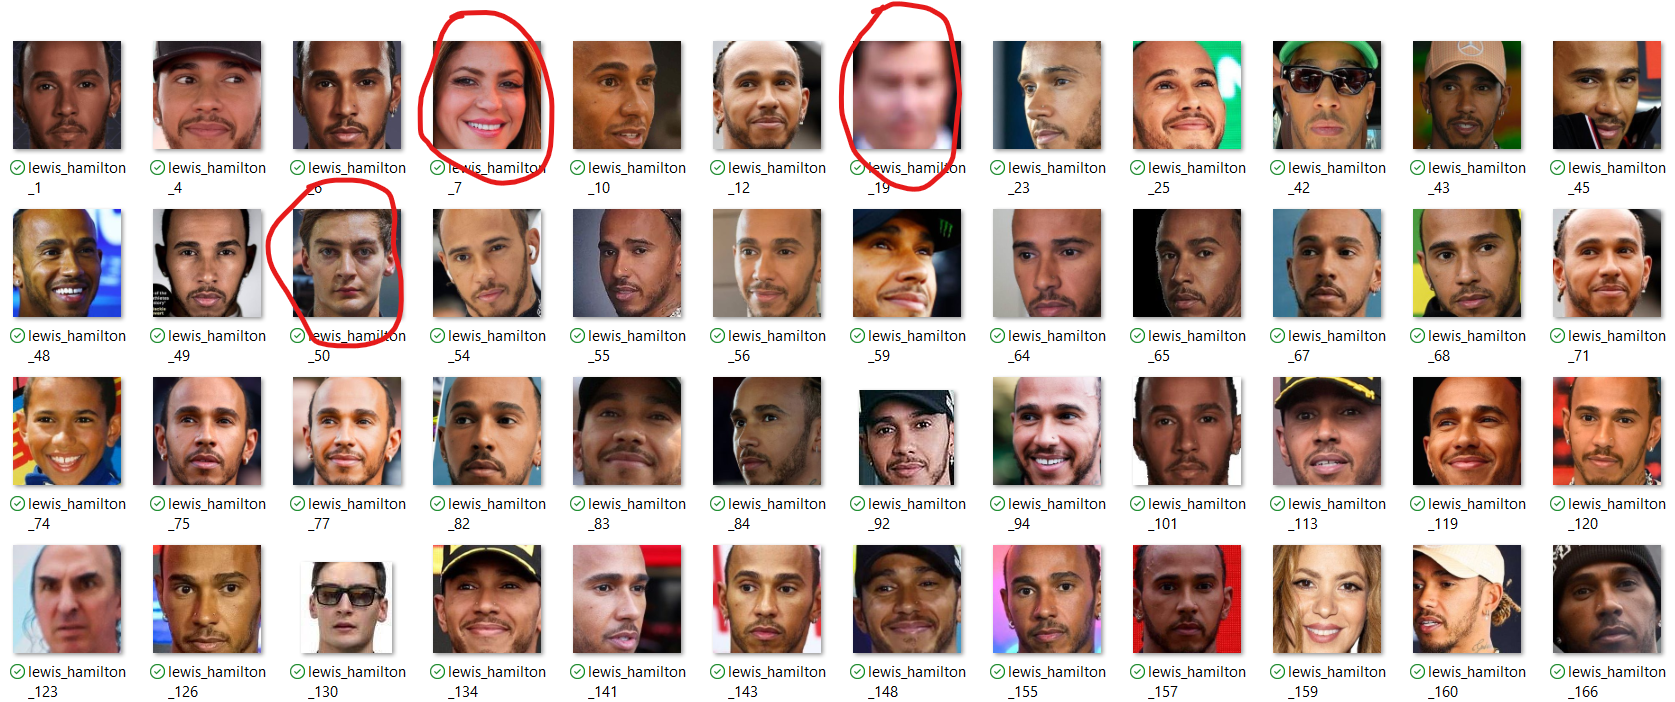